지도 학습
- 훈련 데이터와 정답이 필요
- 분류, 회귀

비지도 학습
- 입력데이터만 사용
- 비슷한 특징끼리 군집화
- 새로운 데이터에 대한 결과 예측

강화 학습
- 현재 상태에서 어떤 행동을 취하는 것이 최선인지 학습
- 보상을 최대화하는 방법으로 학습

In [1]:
# 훈련 세트와 테스트 세트 만들기 #1
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8,
8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] # 2차원 리스트[길이, 무게]
fish_target = [1] * 35 + [0]*14 # target 값 생성

In [2]:
# 훈련 세트와 테스트 세트 만들기 #2
# 훈련 세트와 테스트 세트 만들기
# 훈련 세트: 35개, 테스트 세트: 14개로 분리

# 훈련 세트 생성(35개)
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 세트 생성(14개)
test_input = fish_data[35:]
test_target = fish_target[35:]

In [3]:
# 테스트 세트로 평가하기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 객체 생성
kn = kn.fit(train_input, train_target) # 모델 훈련
kn.score(test_input, test_target) # 테스트 세트로 평가 (정확도 출력)

0.0

잘못된 훈련 데이터 사용 결과 -> 정확도 0

잘못된 훈련 데이터 : 샘플링 편향  
올바른 훈련 데이터 : 샘플링이 도미와 빙어 골고루 섞어야됨

### Numpy를 활용한 배열 생성
• random.seed(seed) : 랜덤값 생성을 위한 초기값 지정  
– 초기값(seed)값이 같으면 동일한 랜덤값을 뽑을 수 있음  

• Numpy.arange(stop): stop-1까지 1의 간격으로 배열 생성  
– arange: array range  

• random.shuffle(x): 배열 x(ndarray 타입)를 무작위로 섞음

In [9]:
import numpy as np # numpy 라이브러리 호출

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42) #  랜덤값 고정
index_list = np.arange(49) # 0~48까지 값을 가지는 배열 생성
print(index_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [10]:
np.random.shuffle(index_list) # 배열 내용을 무작위로 섞음
print(index_list)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [11]:
# 랜덤 배열로 훈련 세트와 테스트 세트 만들기
# 훈련 세트 생성
train_input = input_arr[index_list[:35]]
train_target = target_arr[index_list[:35]]

# 테스트 세트 생성
test_input = input_arr[index_list[35:]]
test_target = target_arr[index_list[35:]]

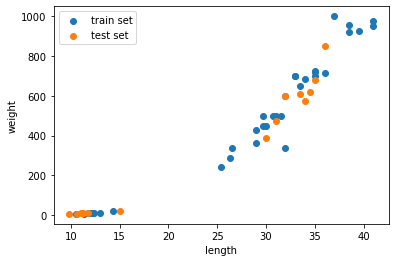

In [12]:
# 훈련 데이터와 테스트 데이터 다시 확인
import matplotlib.pyplot as plt

# [:, 0] 모든 행에서 0번째 length, [:, 1] 모든 행에서 1번째 weight
plt.scatter(train_input[:, 0], train_input[:, 1], label='train set')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test set')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## 두 번째 머신러닝 프로그램

In [15]:
kn = kn.fit(train_input, train_target)
print("score :", kn.score(test_input, test_target))
print("predict :    ", kn.predict(test_input))
print("test_target :", test_target)

score : 1.0
predict :     [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
test_target : [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


100% 정확도

## 문제점 발생
* 길이 25cm, 무게 150g인 도미를 빙어로 판단

In [18]:
print("predict(길이 25cm, 무게 150g) :", kn.predict([[25, 150.0]]))

predict(길이 25cm, 무게 150g) : [0]


• 샘플 데이터의 두 특성(길이, 무게)의 스케일이 다르기 때문  
– 스케일을 조정해야 됨: 표준점수로 변환해야 됨  

• 표준 점수: 평균과의 거리

In [20]:
#column_stack() : numpy에서 사용할 수 있는 zip() 함수
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [22]:
#ones(n) : n 개만큼 1로 채운 배열을 생성
#zeros(n) : n 개만큼 0으로 채운 배열을 생성
#concatenate() : 배열을 서로 연결함
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기
#### train_test_split() 함수
#### sklearn.model_sselection.train_test_split(arrays, test_size, train_size, random_start, shuffle=True, stratify)
- test_size : 기본값은 25%
- train_Size : 기본값은 75%
- random_state : 랜덤 시드 설정
- strarify : target 데이터를 전달하면, 클래스 비율에 맞게 데이터를 나눔

In [25]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state= 42)

print('train_input.shape :', train_input.shape,
'test_input.shape :', test_input.shape)

train_input.shape : (36, 2) test_input.shape : (13, 2)


In [24]:
print('train_target :', train_target)

train_target : [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [27]:
# k-최근접 이웃 모델 적용
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

print("score :", kn.score(test_input, test_target))

score : 1.0


In [30]:
# 25cm, 150g의 생성 분류 (수상한 도미)
print(kn.predict([[25, 150]]))

[0.]


여전히 수상한 도미를 빙어로 분류함

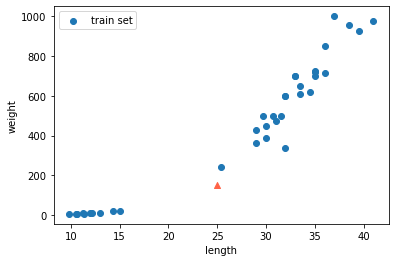

In [32]:
# 길이 25cm, 무게 150g의 생선을 산점도로 표시
import matplotlib.pyplot as plt

# [:, 0] 모든 행에서 0번째 length, [:, 1] 모든 행에서 1번째 weight
plt.scatter(train_input[:, 0], train_input[:, 1], label='train set')
plt.scatter(25, 150, marker='^', c ='tomato')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [40]:
distances, indexes = kn.kneighbors([[25, 150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


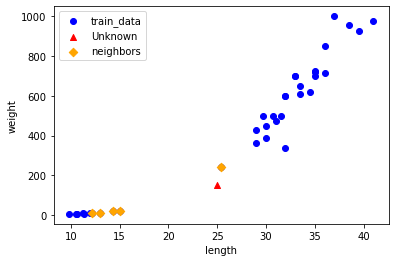

In [43]:
plt.scatter(train_input[:, 0], train_input[:, 1], label='train_data', color='b')

plt.scatter(25, 150, marker='^', color='r', label='Unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1],

marker='D', label='neighbors', color='orange')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

근접한 5개의 요소 중에 도미는 1개, 빙어는 4개 -> 빙어로 판단

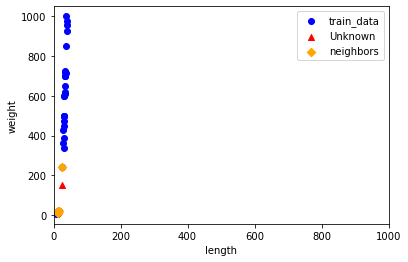

In [47]:
# x축과 y축을 동일하게 설정
plt.scatter(train_input[:, 0], train_input[:, 1],

label='train_data', color='b')

plt.scatter(25, 150, marker='^', color='r', label='Unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D', label='neighbors', color='orange')
plt.xlim((0, 1000)) # x축의 눈금 간격을 y축과 동일하게 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

### 데이터 전처리
표준점수(Z) = (x - u) / o

In [49]:
mean = np.mean(train_input, axis = 0) # axis = 0 : 각 컬럼의 평균 계산
std = np.std(train_input, axis = 0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [52]:
train_scaled = (train_input - mean) / std
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


### 전처리 데이터로 모델 훈련

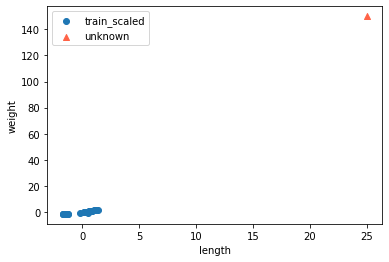

In [57]:
# 표준 점수로 변환한 훈련 데이터 분포 확인
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(25, 150, marker='^', label='unknown', c = 'tomato')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

샘플 데이터(25, 150)은 표준 점수가 아니라 그래프가 이상하게 그려짐  
-> 샘플 데이터를 표준 점수로 변환

In [54]:
new = ([25, 150] - mean) / std
print("표준 점수 sample :", new)

표준 점수 sample : [-0.23012627 -0.94060693]


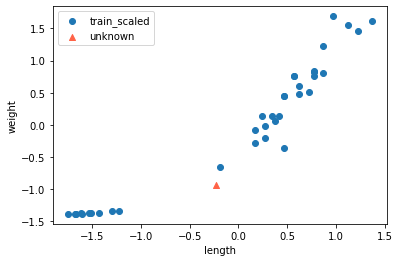

In [56]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(new[0], new[1], marker='^', label='unknown', c = 'tomato')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [59]:
# 표준점수로 변환한 훈련 데이터로 k-NN 훈련
kn.fit(train_scaled, train_target)

# 테스트 세트를 표준 점수로 변환
test_scaled = (test_input - mean) / std
print(kn.score(test_scaled, test_target))

# 표준 점수로 변환된 샘플 데이터를 가지고 예측
print(kn.predict([new]))

1.0
[1.]


드디어 수상한 도미를 도미라고 인식

최종 시각화

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


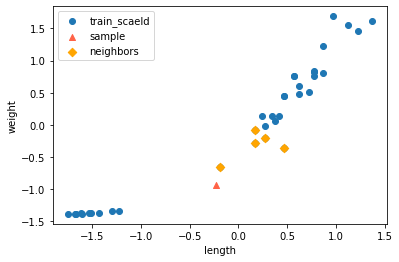

In [64]:
# 표준 점수로 변경된 샘플 데이터의 이웃 찾기 및 산점도
distacnes, indexes = kn.kneighbors([new])
print(distances)

plt.scatter(train_scaled[:,0], train_scaled[:, 1], label='train_scaeld')
plt.scatter(new[0], new[1], marker ='^', label='sample', color = 'tomato')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D', label = 'neighbors', color = 'orange')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()